# EE798 FISA: Assignment

## Analyzing without replacing Nan values:

Given the data of open pit mining in Singrauli, we start by analyzing the data without replacing NaN values and working with whatever data that is present with us.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Open pit blasting.csv",index_col = 0, header = 0)
df = pd.DataFrame(data)
df.columns = [ 'From', 'To', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'OZONE (µg/m3)', 'BENZENE (µg/m3)']
df = df[:-3]
df['From'] = pd.to_datetime(df['From'], format = '%Y-%m-%d %H:%M:%S')
df.drop(['To'], axis=1, inplace=True)

<IPython.core.display.Javascript object>


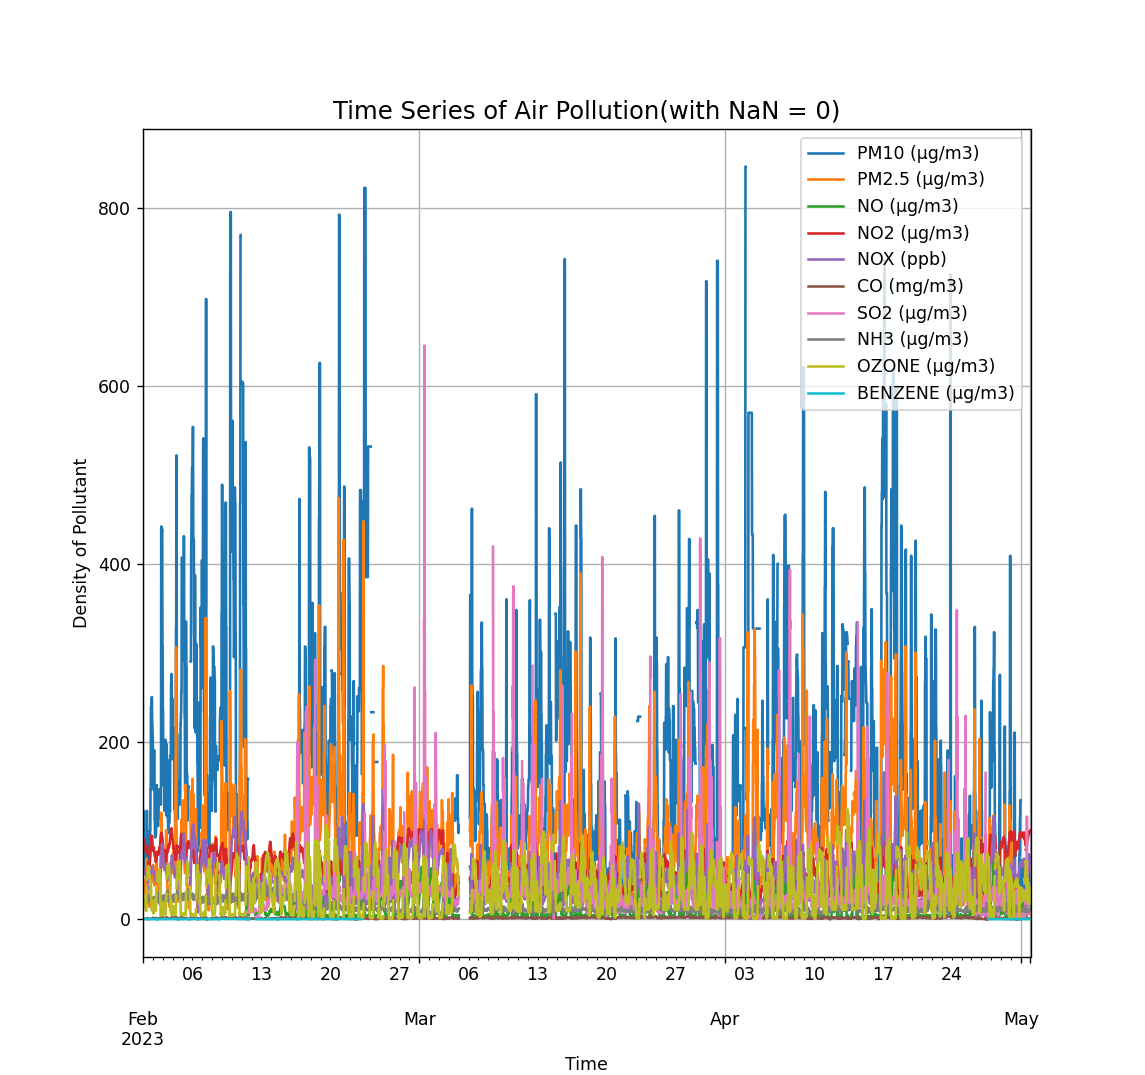

In [5]:
%matplotlib notebook
df.set_index(['From'], inplace = True)
df.plot()
plt.xlabel('Time')
plt.ylabel('Density of Pollutant')
plt.title('Time Series of Air Pollution(with NaN = 0)', fontsize = 14)
plt.grid()
plt.legend(loc=1)

<IPython.core.display.Javascript object>


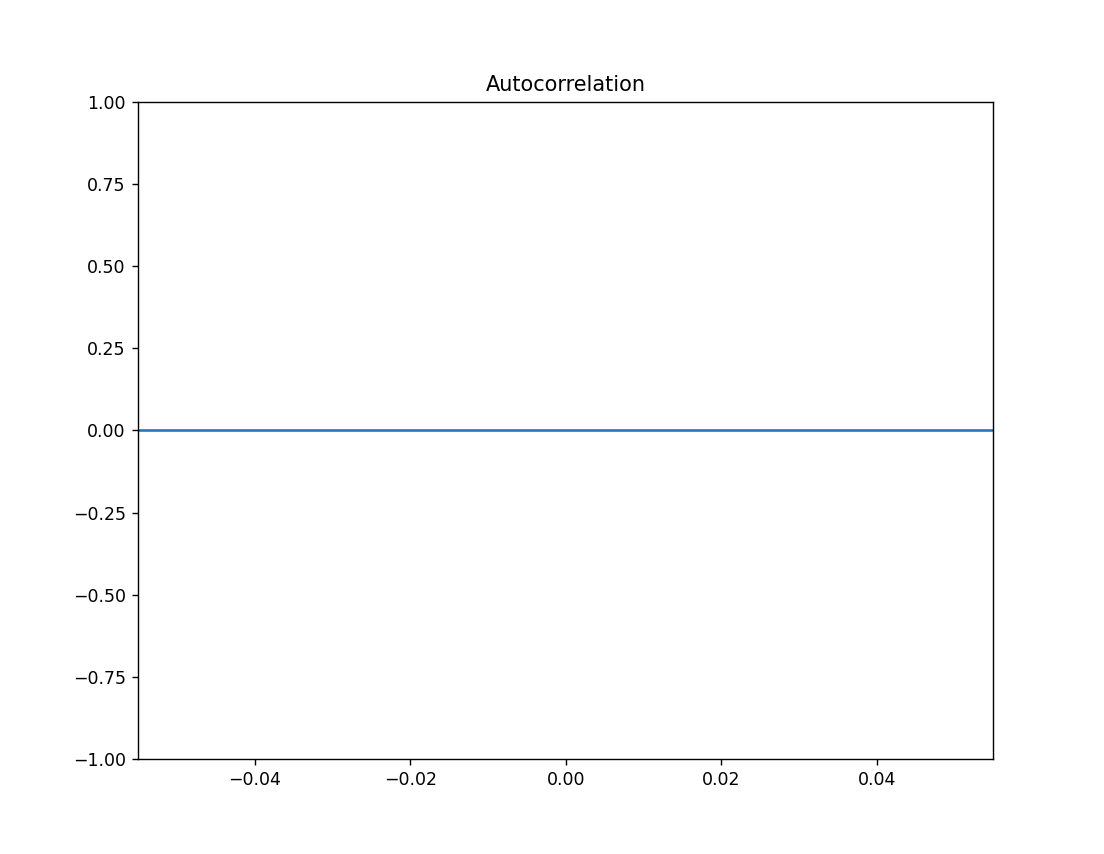

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<IPython.core.display.Javascript object>


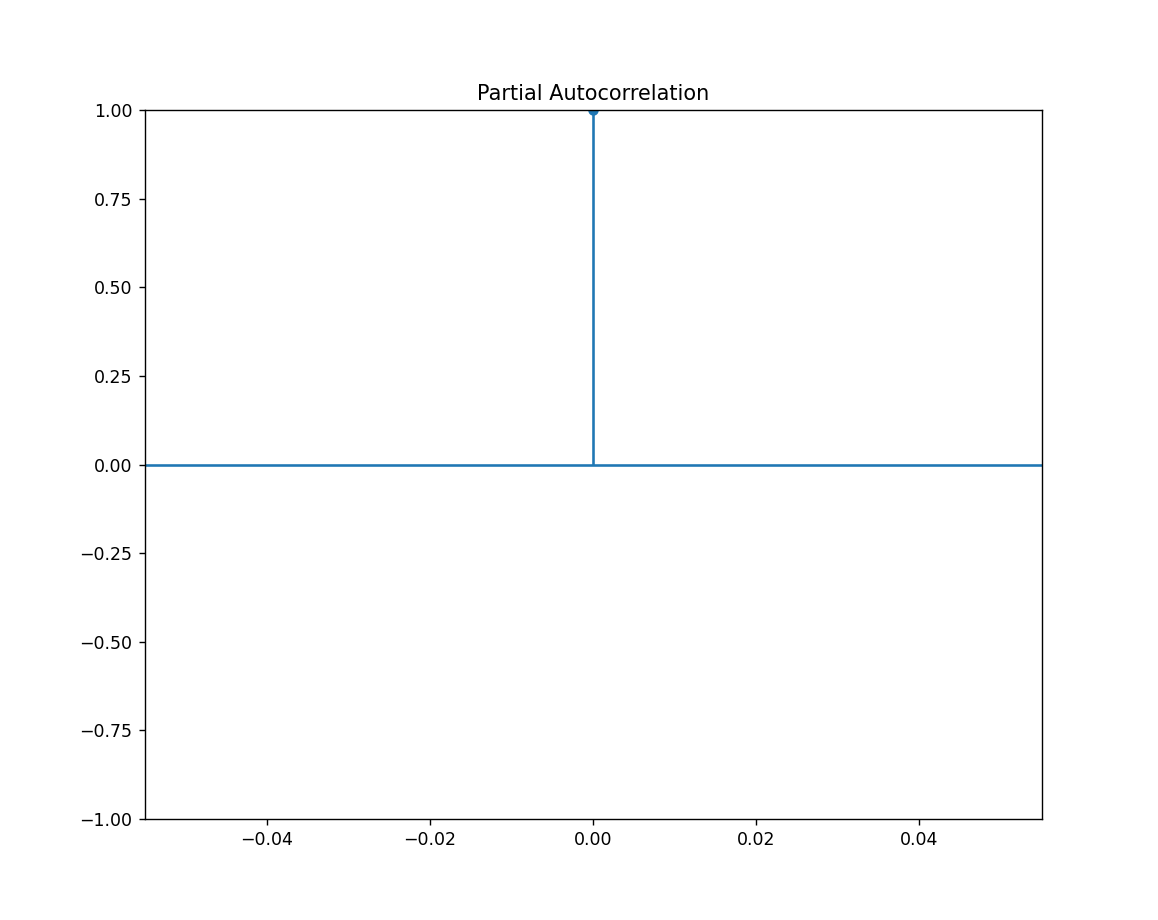

In [6]:
time_stamp = df.index[7990]
msk = (df.index <= time_stamp)
df_train = df[msk].copy()
df_test = df[~msk].copy()
acf_plt = plot_acf(df_train['PM10 (µg/m3)'])
pacf_plt = plot_pacf(df_train['PM10 (µg/m3)'], method = 'ywm')

We are not able to plot acf and pacf plots without replacing nan values, hence it is necessary to replace Nan values in the data. So, we will start by replacing them with 0.